In [54]:
from src.data import DataLoaders
from src import utils
import pandas as pd
#from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt
from pathlib import Path
from datetime import date, datetime
import numpy as np
#import geopandas as geo
import subprocess

In [55]:
expt_num = 2 

In [56]:
# grab version of code 
subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD'])

b'5fe66aa\n'

In [59]:

  
expt_path =  Path.cwd() / 'Data' /  'Logs' / f'Experiment_{expt_num}'

In [66]:
expt_log =  pd.DataFrame( {'Experiment Number': expt_num ,
 'Date': datetime.now(),
 'Log_folder' : expt_path,
 'Code_Repo' :   subprocess.check_output(['git', 'config', '--get', 'remote.origin.url']),                        
 'Code_Version': subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD']).strip(),
 'ACS_Version': '2016',
 'Level': 'block_group',
 'NFIRS_Years_used_start': '2012',                                        
 'NFIRS_Years_used_end': '2017',
 'NFIRS_Year_predicted': '2018',
  'Severity_dollar_estimate' : 10000,
  'ACS_cols_used': [ACS_cols_to_use] 
} )
                                         

In [45]:
from datetime import datetime

In [47]:
print(datetime.now())

2022-08-01 14:10:56.398912


In [64]:
master_log_file_path = expt_path.parent / 'MasterLog.csv'

In [68]:
if master_log_file_path.exists():
    expt_log.to_csv ( master_log_file_path,mode ='a', header = False, index = False )
else:
    expt_log.to_csv ( master_log_file_path, header = True, index = False )

In [2]:
ACS =  DataLoaders.ACSData(2016,'block_group')

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:72: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ACS.drop('geoid','columns',inplace =True)
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:83: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ACS.drop('inc_pcincome','columns',inplace= True)
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:92: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ACS.drop(col,'columns', inplace = True)


In [3]:
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop,sev=True)

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:198: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  self.Load()


In [11]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']

In [5]:
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')

In [6]:
FPM.train(NFIRS,ACS,ACS_cols_to_use)

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:172: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:219: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)


217739
202783
Predicting 2017:
[11:56:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Feature ranking:
1. Max (0.391683)
2. Median (0.151015)
3. pct_alt_heat (0.088431)
4. house_pct_live_alone (0.077854)
5. race_pct_black_or_amind (0.076285)
6. house_yr_pct_before_1960 (0.072331)
7. did_not_work_past_12_mo (0.071676)
8. inc_pct_poverty (0.070725)


In [7]:
FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)

217739
202783
Predicting 2017:
[11:56:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature ranking:
1. Median (0.342500)
2. Max (0.182375)
3. did_not_work_past_12_mo (0.082851)
4. race_pct_black_or_amind (0.080679)
5. pct_alt_heat (0.080051)
6. house_pct_live_alone (0.078125)
7. house_yr_pct_before_1960 (0.077756)
8. inc_pct_poverty (0.075663)


In [8]:
ARC =  DataLoaders.ARCPData()

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '_')
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '_')


In [9]:
ARC.data

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534590,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [10]:
SVI =  DataLoaders.SVIData(ACS.data)
SVI.data

,inc_pct_poverty,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,,
010010201001,0.191946,0.3913,0.5597,0.3735,0.0993
010010201002,0.044269,0.3913,0.5597,0.3735,0.0993
010010202001,0.382199,0.7065,0.3585,0.5821,0.7299
010010202002,0.111426,0.7065,0.3585,0.5821,0.7299
010010203001,0.042301,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...,...
560459511001,0.094029,0.3925,0.6370,0.2331,0.8555
560459511002,0.062579,0.3925,0.6370,0.2331,0.8555
560459513001,0.261512,0.5093,0.6043,0.2862,0.6949


In [11]:
Smoke = SmokeAlarmModels()

-----Training_Performance------
106.5576117354716
Test RMSE: 10.322674640589598
Test MAE: 7.696866556625249


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


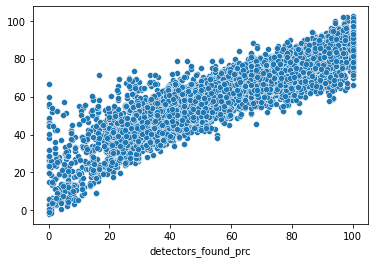

-----Test Performance ----- 
Test RMSE: 13.318445554092381
Test MAE: 9.822200983679112


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


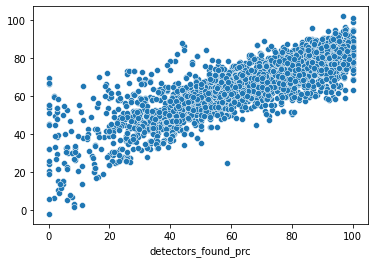

Test Correlation: (0.8268542459815446, 0.0)
Test R-squared: 0.6473428880142709

 Feature ranking:
1. RPL_THEME1 (0.263258)
2. RPL_THEME2 (0.185160)
3. RPL_THEME3 (0.181151)
4. RPL_THEME4 (0.177579)
5. Population Density (per square mile), 2010 (0.147673)
6. inc_pct_poverty (0.045179)


In [12]:
svi_use = True
smoke_prediction = Smoke.trainModels(ARC,ACS,SVI, ACS_cols_to_use,svi_use, utils.DATA['data'])

In [13]:
smoke_prediction

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract,Predictions,"Population Density (per square mile), 2010"
geoid,,,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400,50.252281,30.6
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400,50.697384,30.6
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303,63.084290,2370.0
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500,63.617790,978.9
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500,65.677917,978.9
...,...,...,...,...,...,...,...,...,...,...,...
560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100,52.191448,1.4
560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100,49.575947,1.4
560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951300,72.748718,91.0


In [14]:
out = NFIRS.fires.copy()
out.columns =  'fires_per_1K_pop_' + out.columns
cols = out.columns

In [15]:
out = ACS.data.merge(out, how = 'left', left_index = True, right_index = True)
out = out[cols]

In [16]:
# Smoke Alarm model munging 


# add number of surveys recorded at the block level
num_surveys_block = Smoke.models['Block_Group']['num_surveys'].copy()
num_surveys_block.index = num_surveys_block.index.str[2:]


out['recorded_home_visits'] = num_surveys_block


# add the statistical model outputs 
Smoke_predicts = Smoke.models['MultiLevel'][
    [ 'detectors_working_prc','detectors_working_CI','geography']].copy()
Smoke_predicts.index = Smoke_predicts.index.str[2:]
out = out.merge(Smoke_predicts,how = 'left', left_index = True, right_index = True)

## add DL model to outputs
DL = pd.DataFrame(smoke_prediction['Population Density (per square mile), 2010'])
DL['detectors_predicted'] = smoke_prediction['Predictions'].copy()

out = out.merge(DL,how = 'left', left_index = True, right_index = True)

In [17]:
out['smoke_detector_risk_frac'] =  1 - out['detectors_predicted'] / 100
out['smoke_detector_risk_score'] =  out['smoke_detector_risk_frac'].rank(pct=True)
out[['smoke_detector_risk_frac','smoke_detector_risk_score']]

,smoke_detector_risk_frac,smoke_detector_risk_score
GEOID,,
010010201001,0.206783,0.223148
010010201002,0.162491,0.115726
010010202001,0.353064,0.688512
010010202002,0.343997,0.661703
010010203001,0.312902,0.565167
...,...,...
560459511001,0.478086,0.910191
560459511002,0.504241,0.930904
560459513001,0.272513,0.430998


In [18]:
# add final invidual predictors 

out['SVI_Theme_1'] = SVI.data['RPL_THEME1'].replace(-999.0, np.NaN)

out['fire_propensity_risk_score'] = FPM.test_prediction_probs[:,1]
out['fire_severity_risk_score'] = FSM.test_prediction_probs[:,1]



In [19]:
# create and add final predictor 

out['CombinedRiskScore'] =  out.loc[:,['smoke_detector_risk_score',
                                       'SVI_Theme_1',
                                       'fire_propensity_risk_score',
                                       'fire_severity_risk_score'] ].mean(axis = 1,
                                                                          skipna = False )

In [20]:
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,detectors_working_CI,geography,"Population Density (per square mile), 2010",detectors_predicted,smoke_detector_risk_frac,smoke_detector_risk_score,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,CombinedRiskScore
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,1.089020,state,504.8,79.321655,0.206783,0.223148,0.3913,0.109424,0.493663,0.304384
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,1.089020,state,504.8,83.750854,0.162491,0.115726,0.3913,0.065521,0.015588,0.147034
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,1.089020,state,1682.5,64.693626,0.353064,0.688512,0.7065,0.258691,0.764298,0.604500
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,1.089020,state,1682.5,65.600319,0.343997,0.661703,0.7065,0.184831,0.197458,0.437623
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,1.089020,state,1633.1,68.709763,0.312902,0.565167,0.5659,0.002488,0.003415,0.284243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,3.199404,state,1.4,52.191448,0.478086,0.910191,0.3925,0.608018,0.579069,0.622444
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,3.199404,state,1.4,49.575947,0.504241,0.930904,0.3925,0.169665,0.444465,0.484383
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,3.199404,state,91.0,72.748718,0.272513,0.430998,0.5093,0.082466,0.692106,0.428717


In [21]:
out['CombinedRiskScore'].describe()

count    216824.000000
mean          0.408138
std           0.210592
min           0.001824
25%           0.245738
50%           0.390523
75%           0.548485
max           0.991595
Name: CombinedRiskScore, dtype: float64

In [22]:
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,detectors_working_CI,geography,"Population Density (per square mile), 2010",detectors_predicted,smoke_detector_risk_frac,smoke_detector_risk_score,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,CombinedRiskScore
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,1.089020,state,504.8,79.321655,0.206783,0.223148,0.3913,0.109424,0.493663,0.304384
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,1.089020,state,504.8,83.750854,0.162491,0.115726,0.3913,0.065521,0.015588,0.147034
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,1.089020,state,1682.5,64.693626,0.353064,0.688512,0.7065,0.258691,0.764298,0.604500
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,1.089020,state,1682.5,65.600319,0.343997,0.661703,0.7065,0.184831,0.197458,0.437623
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,1.089020,state,1633.1,68.709763,0.312902,0.565167,0.5659,0.002488,0.003415,0.284243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,3.199404,state,1.4,52.191448,0.478086,0.910191,0.3925,0.608018,0.579069,0.622444
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,3.199404,state,1.4,49.575947,0.504241,0.930904,0.3925,0.169665,0.444465,0.484383
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,3.199404,state,91.0,72.748718,0.272513,0.430998,0.5093,0.082466,0.692106,0.428717


In [23]:
out_name = f"CombinedModels-{date.today()}.csv"
out.index = '#_' + out.index
out.to_csv(utils.DATA['model-outputs'] / out_name)

In [51]:
# alternate risk score ideas 

#out['CombinedRiskScore'] = (out[["fire_severity_risk_score", "fire_propensity_risk_score"]].max(axis=1) + out['smoke_detector_risk_score'])*100